In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
scipy: 1.12.0
numpy: 1.26.4
matplotlib: 3.8.2
pandas: 2.2.0
sklearn: 1.4.0


In [3]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [9]:
# shape
print(dataset.shape)

(150, 5)


In [11]:
# head
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [12]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


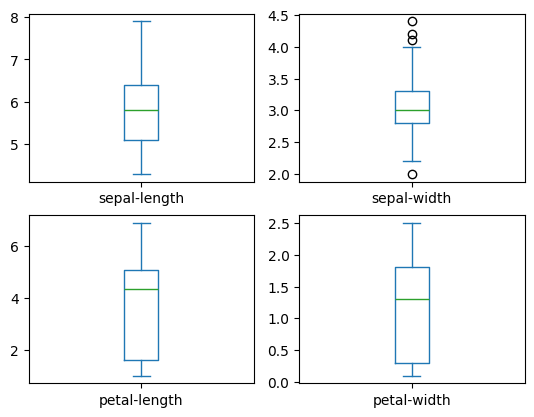

In [16]:
# box and whisker plots
dataset.plot(
    kind='box',
    subplots=True,
    layout=(2,2),
    sharex=False,
    sharey=False)
plt.show()

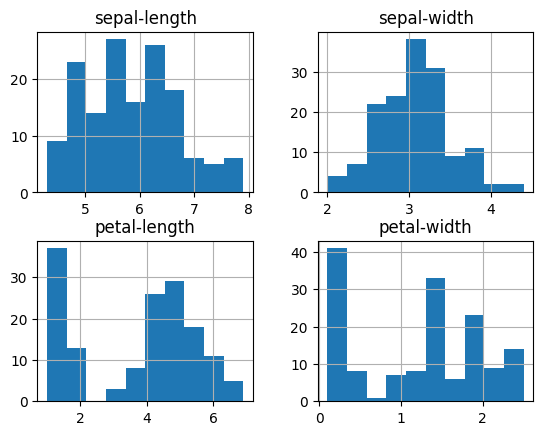

In [17]:
# histograms
dataset.hist()
plt.show()

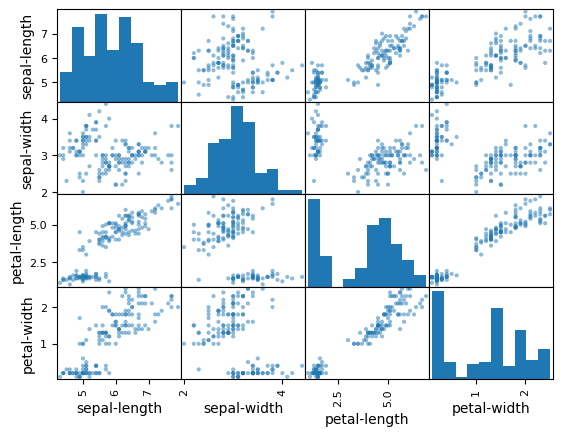

In [18]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [29]:
array = dataset.values
print(array[:5])
print()

X = array[:,0:4]
print(X[:5])
print()

y = array[:,4]
print(y[:5])

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']]

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [45]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.20,
    random_state=1
)

In [47]:
print(len(Y_train))
print(len(Y_validation))
print(len(Y_validation) / (len(Y_train) + len(Y_validation)))

120
30
0.2


In [51]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',
                                        multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1,
                         shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train,
                              cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(),
                        cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


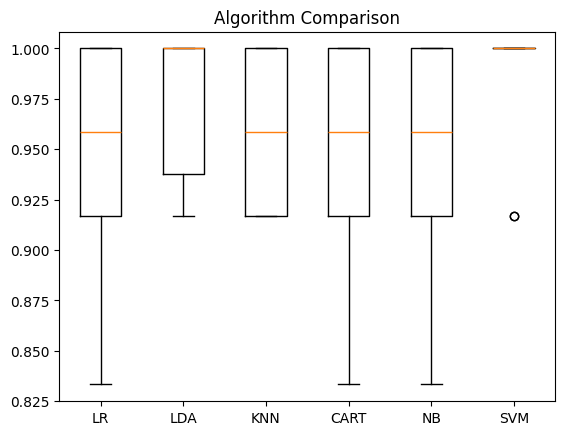

In [52]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [53]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [62]:
# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 0.9666666666666667

confusion matrix =
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

report =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [64]:
# Make predictions using LR
model = LogisticRegression(
    solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 0.8333333333333334

confusion matrix =
 [[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]

report =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.62      0.76        13
 Iris-virginica       0.55      1.00      0.71         6

       accuracy                           0.83        30
      macro avg       0.85      0.87      0.82        30
   weighted avg       0.91      0.83      0.84        30



In [65]:
# Make predictions using LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 1.0

confusion matrix =
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

report =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [66]:
# Make predictions using KNN
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 1.0

confusion matrix =
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

report =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [67]:
# Make predictions using CART
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 0.9666666666666667

confusion matrix =
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

report =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [69]:
# Make predictions using NB
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 0.9666666666666667

confusion matrix =
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

report =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [71]:
# Make predictions using SVM
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("accuracy =",
    accuracy_score(
        Y_validation, predictions))
print("\nconfusion matrix =\n",
    confusion_matrix(
        Y_validation, predictions))
print("\nreport =\n",
    classification_report(
        Y_validation, predictions))

accuracy = 0.9666666666666667

confusion matrix =
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

report =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

